In [1]:
!jt -t chesterish -cellw 88% -T -N

from jupyterthemes import jtplot
jtplot.style()

In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

MAX_ITER = 10
K_MAX = 9
# SEED = np.random.randint(100)
# np.random.seed(53)

In [287]:
animals = pd.read_csv('CA2Data/animals', header=None, delimiter=' ')
countries = pd.read_csv('CA2Data/countries', header=None, delimiter=' ')
fruits = pd.read_csv('CA2Data/fruits', header=None, delimiter=' ')
veggies = pd.read_csv('CA2Data/veggies', header=None, delimiter=' ')
# Assign numerical 'category' values corresponding to true labels
animals[0] = 0
countries[0] = 1
fruits[0] = 2
veggies[0] = 3

dataset = pd.concat([animals, countries, fruits, veggies], ignore_index=True)
# dataset

In [288]:
# store category data to compute metrics
# category = np.array(dataset[0])
category = np.array(dataset[0]).reshape(-1,1)
category.shape

(327, 1)

In [289]:
# drop category column
dataset.drop(columns=[0], inplace=True)
# dataset

In [290]:
dataset = np.array(dataset)
dataset.shape

(327, 300)

In [291]:
# K-mean * K-medians

def normalise_data(data):
    c = np.linalg.norm(data,axis=1).reshape(-1,1)
    return (1/c)*data


def euclidean_distance(X,Y):
    # Return the Euclidean distance between X and Y
    # return np.sqrt(np.sum((X-Y)**2))
    return np.linalg.norm(X-Y)


def manhattan_distance(X,Y):
    # Return the Manhattan distance between X and Y
    # return np.abs(X-Y).sum()
    return np.sum(np.abs(X-Y))


def check_convergence(k_means, k_medians):
    # if k_means:
    #     np.sum()
    pass


def fit_model(k, MAX_ITER):
    np.random.seed(53)
    num_centroids = k
#     print(f'k: {k}')
    # Initialise 'k' centroids (y1, .. yk) randomly from the data set
    centroids = data[np.random.randint(data.shape[0], size=num_centroids), :]
#     print(f'length centroids {len(centroids)}')
#     print('Initial centroids\n', centroids[:,:5])

    for _ in range(MAX_ITER):
        # if check_convergence():
        #     break
        
        # for the current iteration, get the centroids (index value) assigned to the corresponding datapoints index
        clusters = group_data_to_cluster(centroids)
        # get updated centroids for current iteration
        centroids = update_centroids(clusters, centroids)

    return clusters, centroids

def group_data_to_cluster(centroids):
    num_centroids = len(centroids)
    num_datapoints = len(data)
    # Initialise 'clusters', to later store the centroid index value to the corresponding datapoint index
    clusters = np.zeros((num_datapoints, 1))

    # loop through each datapoint
    for index in range(num_datapoints):
        # Initialise 'distances', to store the 'distance' value from each centroid to the datapoint
        distances = np.zeros((num_centroids, 1))
        # Loop through each centroid
        for centroid_index in range(num_centroids):
            if k_means:
                # for k-means, find the eucledian distance from the datapoint to each centroid
                distance_to_centroid = euclidean_distance(data[index], centroids[centroid_index])
                # update the 'distance' value to the 'distances' array
                distances[centroid_index] = distance_to_centroid

            elif k_medians:
                # for k-medians, find the manhattan distance from the datapoint to each centroid
                distance_to_centroid = manhattan_distance(data[index], centroids[centroid_index])
                # update the 'distance' value to the 'distances' array
                distances[centroid_index] = distance_to_centroid

        # Get the closest centroids index value
        closest_centroid_index = np.argmin(distances)
        # Assign the closest centroid index value to the corresponding datapoint index (in the 'clusters' array)
        clusters[index] = closest_centroid_index
#     print(clusters)
    return clusters


def update_centroids(clusters, centroids):
    num_centroids = len(centroids)
    # Iterate over the centroids, to update them based on the updated cluster data
    for centroid_index in range(num_centroids):
        if k_means:
            # Compute the mean of datapoints for each cluster, and set them as the new centroids
            centroids[centroid_index] = np.mean(data[clusters.flatten() == centroid_index], axis=0)
        elif k_medians:
            # Compute the median of datapoints for each cluster, and set them as the new centroids
            centroids[centroid_index] = np.median(data[clusters.flatten() == centroid_index], axis=0)
    return centroids


def compute_metrics(clusters, category):
    num_datapoints = len(data)
    precision = np.zeros((num_datapoints))
    recall = np.zeros((num_datapoints))
    f_score = np.zeros((num_datapoints))
#     print(f'num_datapoints {num_datapoints}')
#     print(f'clusters\n {clusters.shape}')
#     print(f'category\n {category}')
    for index in range(num_datapoints):
        # get the count of the 'category' from it's assigned 'cluster'
#         print(index)
#         print(clusters[index])
#         print(clusters==clusters[index])
#         print(category[clusters==clusters[index]])
        category_in_cluster_count = np.count_nonzero(category[clusters==clusters[index]] == category[index])
#         print(f'category_in_cluster_count {category_in_cluster_count}')
        # get the total count of datapoints belonging to the 'category' in the dataset
        category_total_count = np.count_nonzero(category==category[index])
        # get the count of datapoints assigned to the 'cluster'
        cluster_elements_count = np.count_nonzero(clusters == clusters[index])
#         print(f'cluster_elements_count {cluster_elements_count}')
        
    #     count = np.sum(cat[clust==clust[index]]==category[index])
        # compute precision
        precision[index] = category_in_cluster_count / cluster_elements_count
        recall[index] = category_in_cluster_count / category_total_count
    #     f_score[index] = 2*precision[index]*recall[index]/(precision[index]+recall[index])
    #     print(f'Count of category {category[index]} in cluster {clust[index]} = {category_in_cluster_count}')
    #     print(f'Count of category {category[index]} in dataset = {category_total_count}')
    #     print(f'Total elements in cluster {clust[index]} = {cluster_elements_count}')
    f_score = 2*precision*recall / (precision+recall)
    # print(precision)
    # print(recall)
    # print(f_score)
    precision = np.round((np.sum(precision) / num_datapoints), 2)
    recall = np.round((np.sum(recall) / num_datapoints), 2)
    f_score = np.round((np.sum(f_score) / num_datapoints), 2)
#     print(f'precision: {precision}')
#     print(f'recall:    {recall}')
#     print(f'f_score:   {f_score}')
    return precision, recall, f_score

def plot_metrics(precisions, recalls, f_scoress):
    k_choices = np.arange(1,K_MAX+1)
    plt.plot(k_choices, precisions, label='precision')
    plt.plot(k_choices, recalls, label='recall')
    plt.plot(k_choices, f_scores, label='f_score')
    plt.xlabel('K')
    plt.ylabel('Metrics')
    plt.xticks(np.arange(1,K_MAX+1))
    plt.legend()
    if l2_len_norm:
        plt.title("B-CUBED Metrics for {alg}\n with l2 length normalised data".format(alg="k-means" if k_means == True else "k-medians"))
    else:
        plt.title("B-CUBED Metrics for {alg}\n without l2 length normalised data".format(alg="k-means" if k_means == True else "k-medians"))
    plt.show()

              1     2     3     4     5     6     7     8     9
precision  0.33  0.66  0.76  0.92  0.92  0.93  0.94  0.94  0.95
recall     1.00  1.00  0.91  0.92  0.71  0.64  0.62  0.53  0.46
f-score    0.47  0.75  0.82  0.92  0.78  0.74  0.72  0.63  0.59


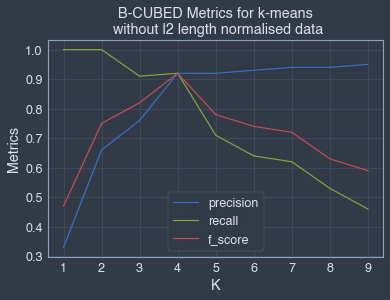

              1     2     3     4     5     6     7     8     9
precision  0.33  0.66  0.79  0.93  0.93  0.96  0.95  0.95  0.95
recall     1.00  1.00  0.94  0.93  0.70  0.64  0.61  0.52  0.46
f-score    0.47  0.75  0.84  0.93  0.78  0.75  0.72  0.63  0.59


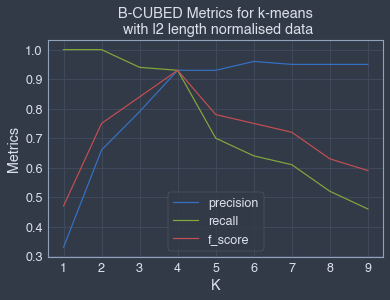

              1     2     3     4     5     6     7     8     9
precision  0.33  0.66  0.78  0.93  0.93  0.94  0.94  0.94  0.94
recall     1.00  1.00  0.94  0.93  0.71  0.65  0.62  0.52  0.48
f-score    0.47  0.75  0.84  0.93  0.78  0.75  0.72  0.63  0.57


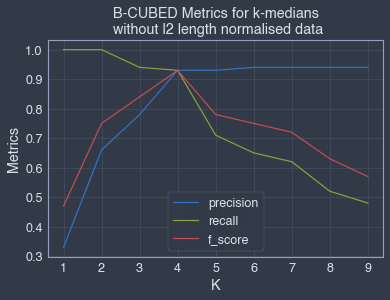

              1     2     3     4     5     6     7     8     9
precision  0.33  0.66  0.80  0.94  0.94  0.95  0.96  0.96  0.96
recall     1.00  1.00  0.95  0.94  0.70  0.65  0.62  0.53  0.49
f-score    0.47  0.75  0.85  0.94  0.78  0.75  0.72  0.64  0.59


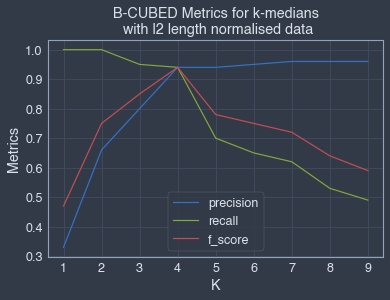

In [292]:
data = deepcopy(dataset)

precisions = np.zeros(K_MAX)
recalls = np.zeros(K_MAX)
f_scores = np.zeros(K_MAX)
# print(precisions)
# print(len(precisions))

# if user_choice == '1':
# Run K_means without l2 length normalised data
k_means = True
k_medians = False
l2_len_norm = False
if l2_len_norm:
    data = normalise_data(data)
else:
    data = deepcopy(dataset)
    
for k in range(1, K_MAX+1):
    clusters, _ = fit_model(k, MAX_ITER)
    precisions[k-1], recalls[k-1], f_scores[k-1] = compute_metrics(clusters, category)
print(pd.DataFrame((precisions, recalls, f_scores), index=['precision', 'recall', 'f-score'], columns=[np.arange(1,K_MAX+1)]))
plot_metrics(precisions, recalls, f_scores)


# elif user_choice == '2':
# Run K_means with l2 length normalised data
k_means = True
k_medians = False
l2_len_norm = True
if l2_len_norm:
    data = normalise_data(data)
else:
    data = deepcopy(dataset)
    
for k in range(1, K_MAX+1):
    clusters, _ = fit_model(k, MAX_ITER)
    precisions[k-1], recalls[k-1], f_scores[k-1] = compute_metrics(clusters, category)
print(pd.DataFrame((precisions, recalls, f_scores), index=['precision', 'recall', 'f-score'], columns=[np.arange(1,K_MAX+1)]))
plot_metrics(precisions, recalls, f_scores)

# elif user_choice == '3':
# Run K_medians without l2 length normalised data
k_means = False
k_medians = True
l2_len_norm = False
if l2_len_norm:
    data = normalise_data(data)
else:
    data = deepcopy(dataset)
    
for k in range(1, K_MAX+1):
    clusters, _ = fit_model(k, MAX_ITER)
    precisions[k-1], recalls[k-1], f_scores[k-1] = compute_metrics(clusters, category)
print(pd.DataFrame((precisions, recalls, f_scores), index=['precision', 'recall', 'f-score'], columns=[np.arange(1,K_MAX+1)]))
plot_metrics(precisions, recalls, f_scores)

# elif user_choice == '4':
    # Run K_medians with l2 length normalised data
k_means = False
k_medians = True
l2_len_norm = True
if l2_len_norm:
    data = normalise_data(data)
else:
    data = deepcopy(dataset)
    
for k in range(1, K_MAX+1):
    clusters, _ = fit_model(k, MAX_ITER)
    precisions[k-1], recalls[k-1], f_scores[k-1] = compute_metrics(clusters, category)
print(pd.DataFrame((precisions, recalls, f_scores), index=['precision', 'recall', 'f-score'], columns=[np.arange(1,K_MAX+1)]))
plot_metrics(precisions, recalls, f_scores)

# print(centroids)

In [293]:
#### ******************* IGNORE CODE BELOW ********************

#### TESTING THE CODE

from sklearn.cluster import KMeans

model = KMeans(n_clusters=k)
model.fit(data)
print("\n\nOutput from SKLEARN")
print(model.cluster_centers_)



Output from SKLEARN
[[ 0.03251465  0.05598727 -0.00621914 ...  0.0137108   0.03244397
   0.02304688]
 [-0.04519681 -0.02168463  0.02085719 ... -0.06407204 -0.01390414
   0.00176535]
 [ 0.04019058  0.03993595 -0.02364741 ... -0.00377678 -0.02298037
   0.04851918]
 ...
 [ 0.07432301  0.04637372  0.03061788 ...  0.04930662  0.02945688
   0.03735092]
 [-0.00731302 -0.01204476 -0.01811504 ... -0.01292885 -0.02189592
   0.02926332]
 [-0.02459457 -0.02752384 -0.00084427 ... -0.01455282 -0.05328376
  -0.00153038]]


In [294]:
d = np.array([[1,2,3], 
              [2.3,5.2,6],
              [9,11,7]])
print(d)
np.median(d, axis=0)

[[ 1.   2.   3. ]
 [ 2.3  5.2  6. ]
 [ 9.  11.   7. ]]


array([2.3, 5.2, 6. ])

In [295]:
cat = np.array((1,2,3,1,3,2,2,3,2,3))
print(cat)

clust   = np.array((5,6,5,4,5,6,5,5,4,7))
print(clust)

[1 2 3 1 3 2 2 3 2 3]
[5 6 5 4 5 6 5 5 4 7]


In [296]:
comb = np.vstack((cat, clust))
print(comb.shape)
comb

(2, 10)


array([[1, 2, 3, 1, 3, 2, 2, 3, 2, 3],
       [5, 6, 5, 4, 5, 6, 5, 5, 4, 7]])

In [297]:
np.count_nonzero(comb==2, axis=1)

array([4, 0])

In [298]:
np.bincount(cat)

array([0, 2, 4, 4])

In [299]:
mask = cat[clust==5]
np.count_nonzero(mask[mask==2])
np.count_nonzero(mask==2)

print(mask)
print(mask==2)
print(mask[mask==2])

np.count_nonzero(cat[clust==5]==2)

[1 3 3 2 3]
[False False False  True False]
[2]


1

In [300]:
len_data = len(clust)
precision = np.zeros((len_data))
recall = np.zeros((len_data))
f_score = np.zeros((len_data))
for i in range(len_data):
    # get the count of the 'category' from it's assigned 'cluster'
    category_in_cluster_count = np.count_nonzero(cat[clust == clust[i]] == cat[i])
    # get the total count of datapoints belonging to the 'category' in the dataset
    category_total_count = np.count_nonzero(cat==cat[i])
    # get the count of datapoints assigned to the 'cluster'
    cluster_elements_count = np.count_nonzero(clust == clust[i])
#     count = np.sum(cat[clust==clust[i]]==cat[i])
    # compute precision
    precision[i] = category_in_cluster_count / cluster_elements_count
    recall[i] = category_in_cluster_count / category_total_count
#     f_score[i] = 2*precision[i]*recall[i]/(precision[i]+recall[i])
#     print(f'Count of category {cat[i]} in cluster {clust[i]} = {category_in_cluster_count}')
#     print(f'Count of category {cat[i]} in dataset = {category_total_count}')
#     print(f'Total elements in cluster {clust[i]} = {cluster_elements_count}')
f_score = 2*precision*recall/(precision+recall)
print(precision)
print(recall)
print(f_score)
print(np.sum(precision)/len_data)
print(np.sum(recall)/len_data)
print(np.sum(f_score)/len_data)

[0.2 1.  0.6 0.5 0.6 1.  0.2 0.6 0.5 1. ]
[0.5  0.5  0.75 0.5  0.75 0.5  0.25 0.75 0.25 0.25]
[0.28571429 0.66666667 0.66666667 0.5        0.66666667 0.66666667
 0.22222222 0.66666667 0.33333333 0.4       ]
0.62
0.5
0.5074603174603174


In [301]:
print(cat)
print(clust)

[1 2 3 1 3 2 2 3 2 3]
[5 6 5 4 5 6 5 5 4 7]


In [302]:
for i in range(10):
    mask = cat[clust==clust[i]]
#     count = np.count_nonzero(mask==cat[i])
    count = np.count_nonzero(cat[clust==clust[i]] == cat[i])
    print(count)
    print(f'Count of category {cat[i]} in cluster {clust[i]} = {count}')
# mask

1
Count of category 1 in cluster 5 = 1
2
Count of category 2 in cluster 6 = 2
3
Count of category 3 in cluster 5 = 3
1
Count of category 1 in cluster 4 = 1
3
Count of category 3 in cluster 5 = 3
2
Count of category 2 in cluster 6 = 2
1
Count of category 2 in cluster 5 = 1
3
Count of category 3 in cluster 5 = 3
1
Count of category 2 in cluster 4 = 1
1
Count of category 3 in cluster 7 = 1


In [303]:
cat[clust==5][cat==2]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 5 but corresponding boolean dimension is 10

In [304]:
comb[(comb==5) | (comb==3)]

array([3, 3, 3, 3, 5, 5, 5, 5, 5])

In [305]:
# # select only classes needed for classification
# data = data[np.where((data[:,-1] == positive_class) | (data[:,-1] == negative_class))]

# # converting class labels to numeric values [+1 or -1] based on the 1 v/s rest approach
# data[data=='class-1'] = 1
# data[(data=='class-2') | (data=='class-3')] = -1

In [306]:
np.count_nonzero(np.array((0,0,1))==0)

2

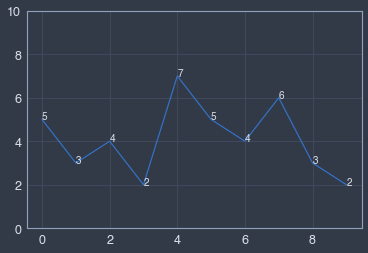

In [307]:
import numpy
from matplotlib import pyplot

x = numpy.arange(10)
y = numpy.array([5,3,4,2,7,5,4,6,3,2])

fig = pyplot.figure()
ax = fig.add_subplot(111)
ax.set_ylim(0,10)
pyplot.plot(x,y)
for i,j in zip(x,y):
    ax.annotate(str(j),xy=(i,j))

pyplot.show()

In [308]:
c = np.linalg.norm(data,axis=1).reshape(-1,1)
c
# np.linalg.norm(data[0])
data_normalised = (1/c)*data
data_normalised

array([[-0.00246962, -0.0123844 , -0.05151071, ..., -0.00356689,
         0.00060593, -0.00553797],
       [ 0.0668472 , -0.12827823, -0.04169634, ..., -0.06260614,
        -0.03495518,  0.00399316],
       [-0.04366553,  0.05058699, -0.05453022, ..., -0.01941572,
        -0.03058343,  0.00509732],
       ...,
       [-0.0521836 , -0.07760682, -0.09517426, ...,  0.00377847,
         0.02026048, -0.05548325],
       [-0.02426032, -0.05379176, -0.06635299, ..., -0.09533733,
        -0.09987333,  0.04280068],
       [-0.07969202, -0.05043384, -0.01694052, ..., -0.00074457,
        -0.11477028,  0.01187741]])

In [309]:
np.linalg.norm(data_normalised,axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [311]:
# np.linalg.norm(data_normalised,axis=0)